## ANALISIS DE DATOS DE OPINIONES EN PORTAL BGG (BOARD GAMES GEEK)

<a id="0"></a> <br>
### Índice:
1. [Introdución](#1)  
2. [Primer análisis (Sin Mechanics ni Domains)](#2)  
3. [Segundo análisis (Con Mechanics y Domains) ](#3)  
4. [Conclusiones antes de predicción](#4)
  

<a id="1"></a> <br>
### INTRODUCCIÓN

Para empezar a mostrar un poco que tenemos entre manos, empezaremos diciendo que **el objetivo de este analisis de datos es obtener y generalizar** los datos al máximo para obtener un modelo predictivo acertado posteriormente.  
  
Así podremos tener la mejor prediccion del rating de usuarios a diferentes caracteristicas: máximo de jugadores, mínimo de jugadores, complejidad...  

Una vez limpiado los datos del dataset de juegos de mesa, vamos a analizar lo que nos deparará.  

 
Todas las columnas han sido limpiadas y cuidadas anteriormente,  [aquí](https://github.com/Kuja182/Prediccion-sobre-juegos-de-mesa/blob/main/notebooks/02_Preprocesamiento.ipynb) explico todo el proceso de limpieza del dataset.  

El dataset original lo puedes ver [aquí](https://www.kaggle.com/datasets/andrewmvd/board-games).

[Volver al índice](#0)

<a id="2"></a> <br>
#### 2. PRIMER ANÁLISIS

Para empezar el analisis importamos todas las librerias necesarias para analizarlo.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from scipy import stats
import plotly.express as px
import plotly.figure_factory as ff

In [4]:
df_clean = pd.read_csv("../data/processed/bgg_proc_clean.csv")

In [5]:
df_clean.head(5)

,ID,Name,Year Published,Min Players,Max Players,Play Time,Min Age,Users Rated,Rating Average,BGG Rank,Complexity Average,Owned Users,Mechanics,Domains
0,174430.0,Gloomhaven,2017,1,4,120,14,42055,8.79,1,3.86,68323,"Action Queue, Action Retrieval, Campaign / Bat...","Strategy Games, Thematic Games"
1,161936.0,Pandemic Legacy: Season 1,2015,2,4,60,13,41643,8.61,2,2.84,65294,"Action Points, Cooperative Game, Hand Manageme...","Strategy Games, Thematic Games"
2,224517.0,Brass: Birmingham,2018,2,4,120,14,19217,8.66,3,3.91,28785,"Hand Management, Income, Loans, Market, Networ...",Strategy Games
3,167791.0,Terraforming Mars,2016,1,5,120,12,64864,8.43,4,3.24,87099,"Card Drafting, Drafting, End Game Bonuses, Han...",Strategy Games
4,233078.0,Twilight Imperium: Fourth Edition,2017,3,6,480,14,13468,8.70,5,4.22,16831,"Action Drafting, Area Majority / Influence, Ar...","Strategy Games, Thematic Games"


In [6]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20343 entries, 0 to 20342
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  20343 non-null  float64
 1   Name                20343 non-null  object 
 2   Year Published      20343 non-null  int64  
 3   Min Players         20343 non-null  int64  
 4   Max Players         20343 non-null  int64  
 5   Play Time           20343 non-null  int64  
 6   Min Age             20343 non-null  int64  
 7   Users Rated         20343 non-null  int64  
 8   Rating Average      20343 non-null  float64
 9   BGG Rank            20343 non-null  int64  
 10  Complexity Average  20343 non-null  float64
 11  Owned Users         20343 non-null  int64  
 12  Mechanics           20343 non-null  object 
 13  Domains             20343 non-null  object 
dtypes: float64(3), int64(8), object(3)
memory usage: 2.2+ MB


Todas las caracteristicas de este dataset son las siguientes:

ID --> Identificación del juego.

Name --> Nombre del juego.  

Year Published --> Año de la publicación del juego.  

Min Players --> Mínimo de jugadores.  

Max Players --> Máximo de jugadores.  

Play Time --> Tiempo de juego recomendado (minutos).  

Min Age --> Edad mínima recomendada para jugar.

Users Rated --> Número de usuarios que han evaluado al juego.  

Rating Average --> Rating de los usuarios (de 0 a 10).  

BGG Rank --> Rango que otorga la pagina web [BGG](https://boardgamegeek.com/)  

Complexity Average --> Complejidad del juego (de 0 a 5).  

Owned Users --> Los usuarios que disponen del juego.  

Mechanics --> Mecanicas del juego.  

Domains --> Género del juego.  


>Lo primero que vamos a hacer es una matriz de correlación para ver las diferentes relaciones que hay en cada variable. (Solo dejamos pendientes, la variables "Mechanics" y "Domains" para analizarlas posteriormente en otro dataset con estas ordenadas y limpias, ya que tienen mas caracteristicas que valorar).

<AxesSubplot:>

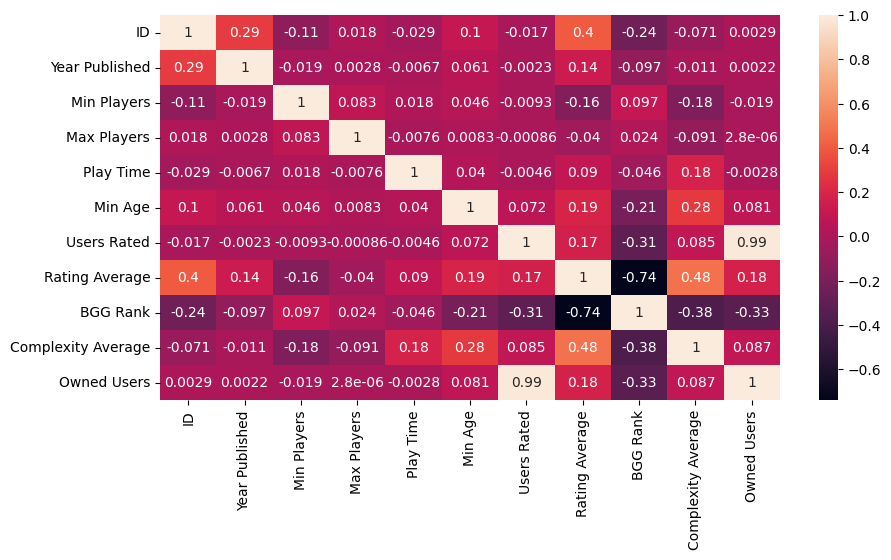

In [7]:
plt.figure(figsize=(10,5))
sns.heatmap(df_clean.corr(),annot=True)

De un primer vistazo podemos ver como se relacionan de manera inversa las variables de "Rating Average" y "BGG Rank", esto da que pensar que no necesariamente las valoraciones de este prestigioso portal de juegos de mesa es muy objetiva o que directamente la gente va buscando un tipo de juego que no tiene nada que ver con los gustos de este portal.  
  
    
Además podemos ver una correlación entre el rating de usuarios y la complejidad del juego, a mayor complejidad mayor es la puntuacion de los usuarios

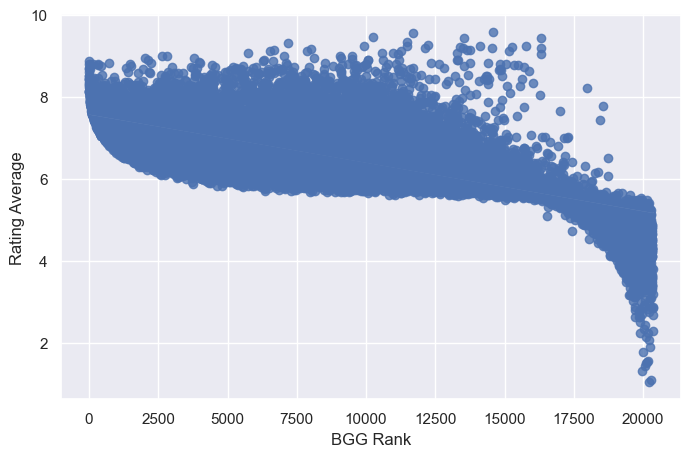

In [8]:
plt.figure(figsize=(8,5))
sns.set(style="darkgrid")
sns.regplot(x=df_clean["BGG Rank"], y=df_clean["Rating Average"]);

Como vemos hay muchos rangos de BGG sobre todo entre 10000 y 17500 donde los valores del rating average de la gente es muy diferente al de la página web

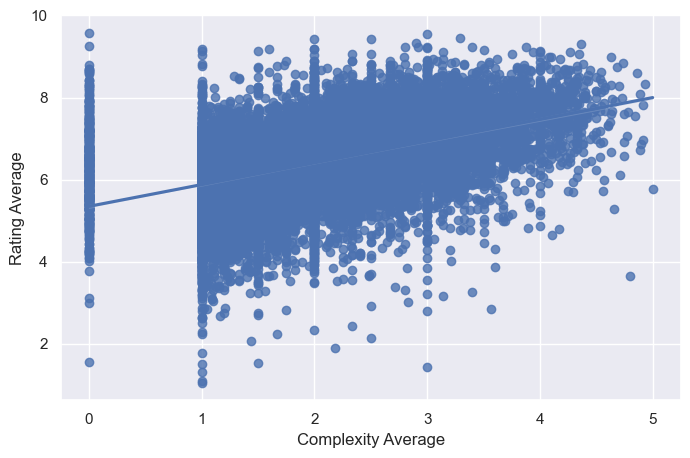

In [9]:
plt.figure(figsize=(8,5))
sns.regplot(x=df_clean["Complexity Average"], y=df_clean["Rating Average"]);

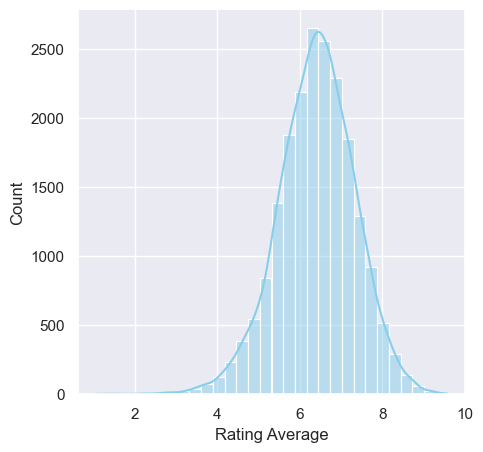

In [10]:
plt.figure(figsize=(5,5))
sns.histplot(data=df_clean, x="Rating Average", color="skyblue", kde=True, bins= 30);

En este caso el rating average tiene una asimetria positiva

In [11]:
asim_rating = stats.skew(df_clean["Rating Average"])
print("Su CAF es igual a" ,asim_rating, "Al tener un coeficience de asimetria negativo nos indica que tiene una asimetria positiva cercano a una distribucion simetrica." )

Su CAF es igual a -0.2996956946354357 Al tener un coeficience de asimetria negativo nos indica que tiene una asimetria positiva cercano a una distribucion simetrica.


A mayor complejidad del juego mayor rating average, por lo que vemos las personas que ven que el juego no es complejo le ponen un 0 sin tener en cuenta pequeñas variaciones(si es que las tienen).

Ahora vamos a echar un vistazo a lo que nos cuenta el campo de mechanics 

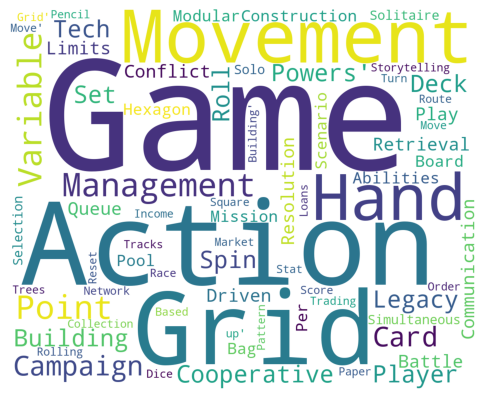

In [12]:
plt.subplots(figsize=(6,6))
wordcloud = WordCloud(background_color='white',width=1200,height=980).generate(str(df_clean["Mechanics"].values))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Sobretodo tenemos una gran parte de palabras como "Game","Movement", "Grid" y "Action" como principales ademas de otros terminos como card por ejemplo importante en los juegos de mesa actuales.  



[Volver al índice](#0)

<a id="3"></a> <br>
### 3. Segundo Analisis 
Como vemos tanto las mecanicas como los generos son fundamentales a la hora de analizar un juego, por tanto los clasificamos en otro dataset donde se han creado nuevas caracteristicas para que se vea reflejada la importancia de estas.  

Ahora nos vamos a meter dentro del apartado mechanics y domains para detallar la clasificación que hemos hecho para posteriormente predecir con ellas.

Cargamos el dataset con las columnas añadidas

In [13]:
df_ml = pd.read_csv("../data/processed/bgg_proc_ml.csv")

In [14]:
df_ml.columns

Index(['ID', 'Name', 'Year Published', 'Min Players', 'Max Players',
       'Play Time', 'Min Age', 'Users Rated', 'Rating Average', 'BGG Rank',
       'Complexity Average', 'Owned Users', 'Mechanics', 'Domains',
       'Mech Not Defined', 'Mech_Acting', 'Mech_Action', 'Mech_tokens',
       'Mech_construcc_farm', 'Mech_roll_thng', 'Mech_cards', 'Mech_role_camp',
       'Mech_board', 'Mech_money', 'Mech_score', 'Mech_turnbased', 'Mech_team',
       'Mech_skill', 'Mech_solo', 'Abstract', 'Children', 'Customizable',
       'Family', 'Party', 'Strategy', 'Thematic', 'Wargames',
       'Domain_Not Defined'],
      dtype='object')

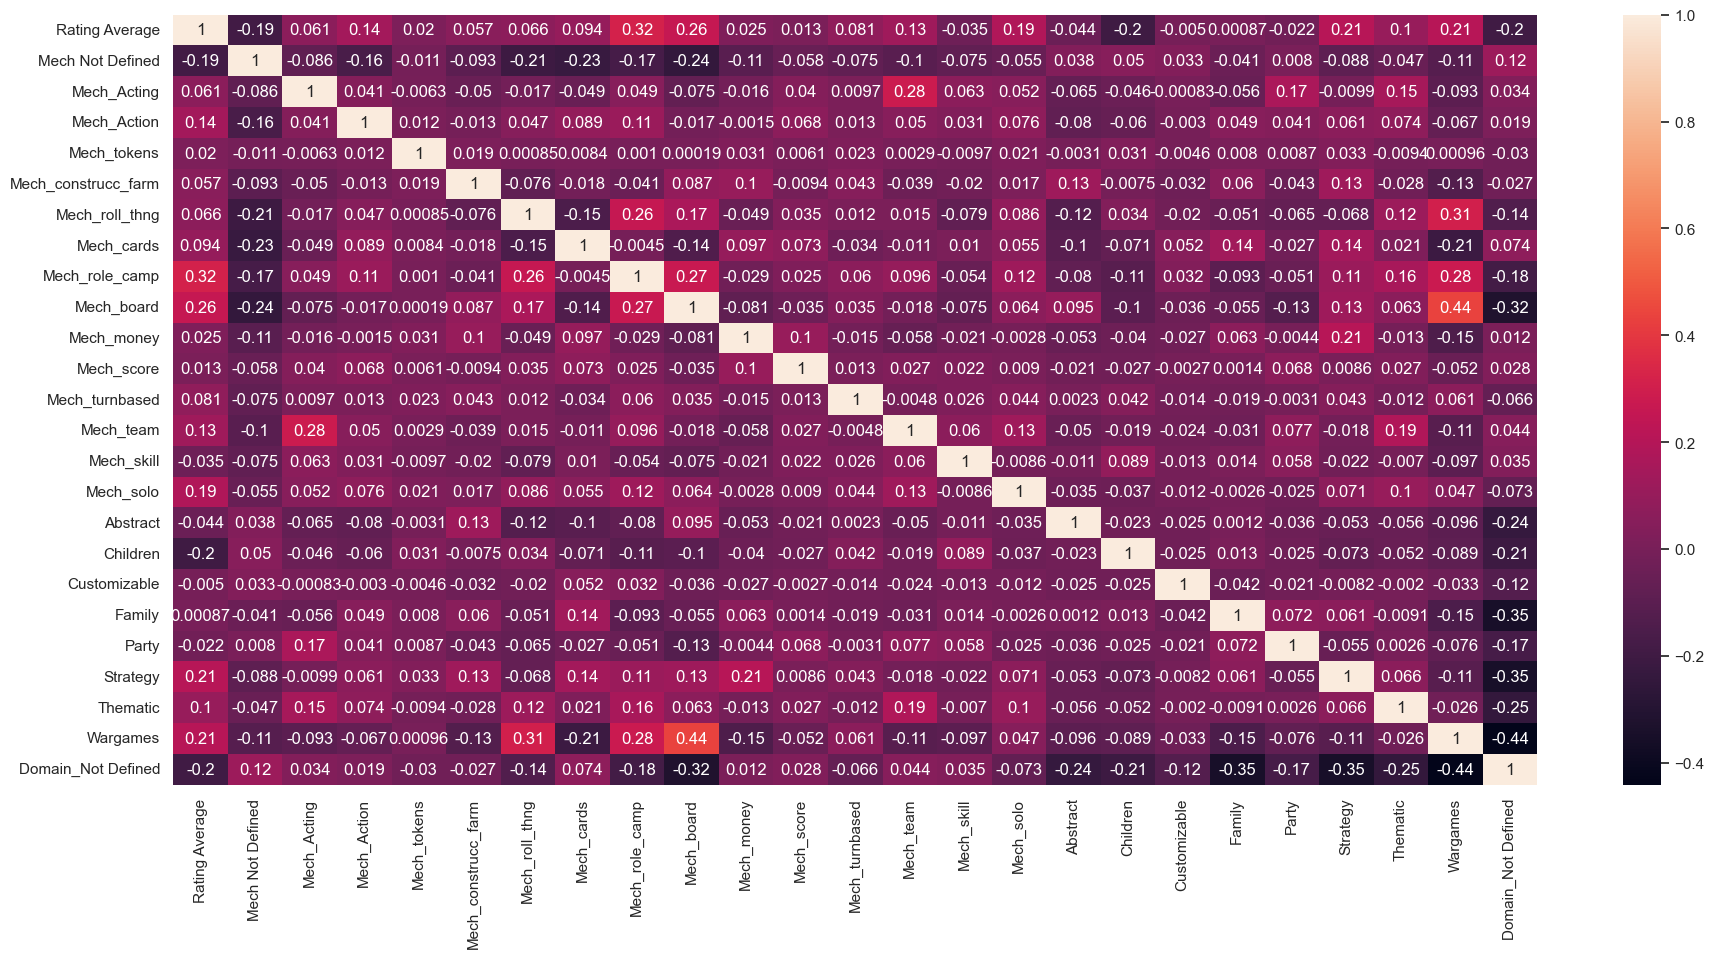

In [15]:
plt.figure(figsize=(22,10))
sns.heatmap(df_ml[['Rating Average','Mech Not Defined', 'Mech_Acting', 'Mech_Action', 'Mech_tokens',
       'Mech_construcc_farm', 'Mech_roll_thng', 'Mech_cards', 'Mech_role_camp',
       'Mech_board', 'Mech_money', 'Mech_score', 'Mech_turnbased', 'Mech_team',
       'Mech_skill', 'Mech_solo', 'Abstract', 'Children', 'Customizable',
       'Family', 'Party', 'Strategy', 'Thematic', 'Wargames',
       'Domain_Not Defined']].corr(),annot=True);

En este caso solo estamos intentando ver la correlación que pueden tener las mecánicas de los juegos con los géneros y las relaciones que hay entre ellas y el rating average de los usuarios.  
Sobretodo nos vamos a fijar que hay una correlación positiva entre el rating average y las mecánicas  role_camp y board, donde se ve que la gente prefiere juegos con tematica rolera con campaña y tablero.

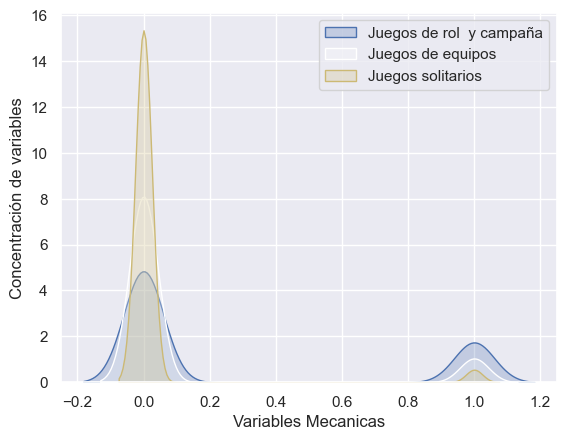

In [27]:
fig = sns.kdeplot(df_ml['Mech_role_camp'], fill=True, label = "Juegos de rol  y campaña",color="b")
fig = sns.kdeplot(df_ml['Mech_team'], fill=True, label = "Juegos de equipos",color="w")
fig = sns.kdeplot(df_ml['Mech_solo'], fill=True, label = "Juegos solitarios",color="y")
plt.xlabel('Variables Mecanicas')
plt.ylabel('Concentración de variables')
plt.legend()
plt.show()


En este caso estamos viendo que destacan por importancia los juegos de rol y campaña, después los juegos de equipo y por último.

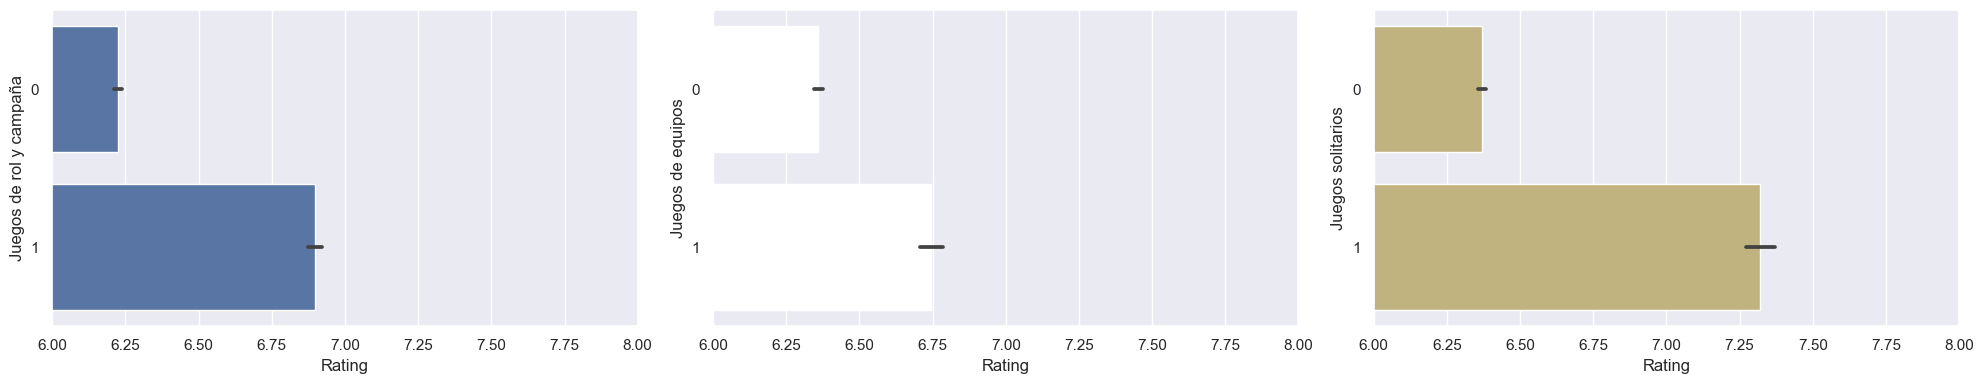

In [56]:
fig, axes = plt.subplots(1, 3, figsize=(20, 4))

sns.barplot(data=df_ml, x='Rating Average', y='Mech_role_camp', label="Juegos de rol y campaña", color="b", orient='h', ax=axes[0])
axes[0].set_xlabel('Rating')
axes[0].set_ylabel("Juegos de rol y campaña")
axes[0].set_xlim(6, 8)

sns.barplot(data=df_ml, x='Rating Average', y='Mech_team', label="Juegos de equipos", color="w", orient='h', ax=axes[1])
axes[1].set_xlabel('Rating')
axes[1].set_ylabel("Juegos de equipos")
axes[1].set_xlim(6, 8)

sns.barplot(data=df_ml, x='Rating Average', y='Mech_solo', label="Juegos solitarios", color="y", orient='h', ax=axes[2])
axes[2].set_xlabel('Rating')
axes[2].set_ylabel("Juegos solitarios")
axes[2].set_xlim(6, 8)

plt.tight_layout()
plt.show()

Al comparar con el rating de usuarios vemos que cuando son juegos de un solo jugador o que no son de equipo, el rating es un poco superior respecto a los juegos de equipo y de campañas

Ahora vemos los géneros mas destacados respecto a la correlación con el rating de usuarios.

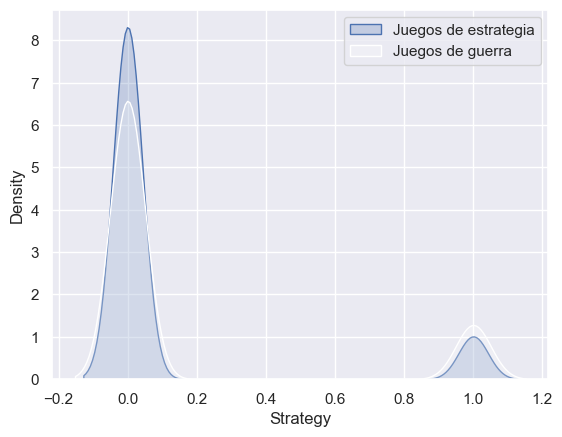

In [24]:
fig = sns.kdeplot(df_ml['Strategy'], fill=True, label = "Juegos de estrategia",color="b")
fig = sns.kdeplot(df_ml['Wargames'], fill=True, label = "Juegos de guerra",color="w")
plt.legend()
plt.show()

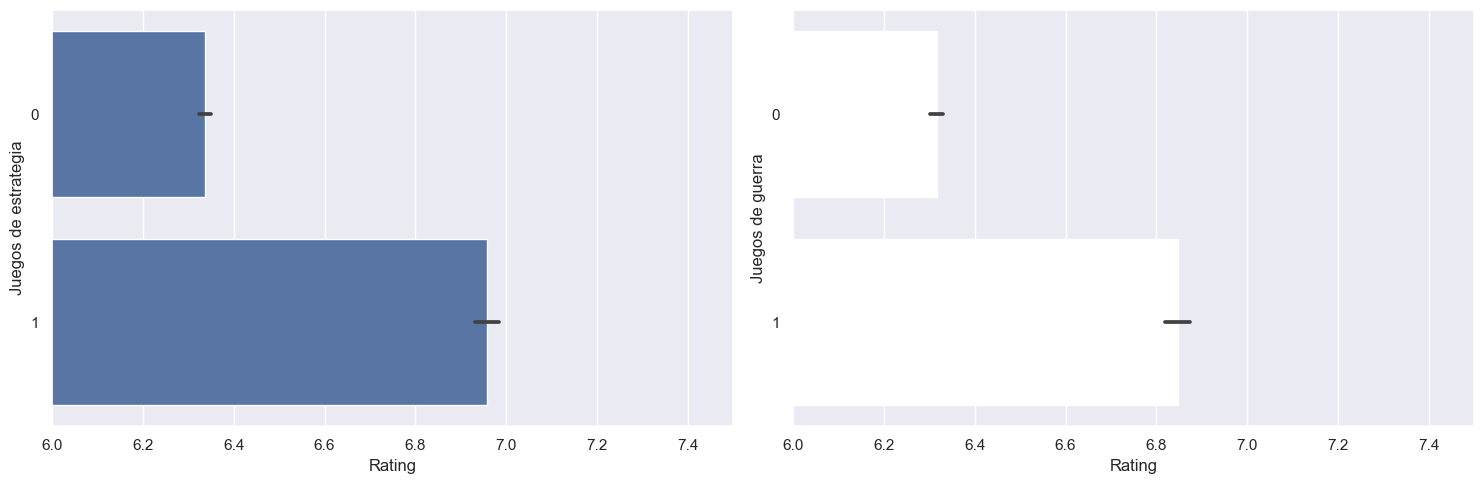

In [58]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.barplot(data=df_ml, x='Rating Average', y='Strategy', label="Juegos de estrategia", color="b", orient='h', ax=axes[0])
axes[0].set_xlabel('Rating')
axes[0].set_ylabel("Juegos de estrategia")
axes[0].set_xlim(6, 7.50)

sns.barplot(data=df_ml, x='Rating Average', y='Wargames', label="Juegos de guerra", color="w", orient='h', ax=axes[1])
axes[1].set_xlabel('Rating')
axes[1].set_ylabel("Juegos de guerra")
axes[1].set_xlim(6, 7.50)

plt.tight_layout()
plt.show()

[Volver al índice](#0)

<a id="4"></a> <br>
### 4. Conclusiones finales

[Volver al índice](#0)